In [1]:
import cv2
import os
import matplotlib.pyplot as plt

directory = "Drive_OD_Images/"

dir1 = "Drive_OD_groundtruth/"

dir2 = "Drive_OD_Predictions/"

In [2]:
#scikit learn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [3]:
import os

input_dir = dir1
target_dir = dir2
img_size = (608, 400)
num_classes = 2
batch_size = 4

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".jpg") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 36
Drive_OD_groundtruth/1.jpg | Drive_OD_Predictions/1.jpg
Drive_OD_groundtruth/10.jpg | Drive_OD_Predictions/10.jpg
Drive_OD_groundtruth/11.jpg | Drive_OD_Predictions/11.jpg
Drive_OD_groundtruth/12.jpg | Drive_OD_Predictions/12.jpg
Drive_OD_groundtruth/13.jpg | Drive_OD_Predictions/13.jpg
Drive_OD_groundtruth/14.jpg | Drive_OD_Predictions/14.jpg
Drive_OD_groundtruth/15.jpg | Drive_OD_Predictions/15.jpg
Drive_OD_groundtruth/16.jpg | Drive_OD_Predictions/16.jpg
Drive_OD_groundtruth/17.jpg | Drive_OD_Predictions/17.jpg
Drive_OD_groundtruth/18.jpg | Drive_OD_Predictions/18.jpg


In [4]:
# Import the necessary libraries
from PIL import Image
import numpy as np

# load the image and convert into numpy array

img1 = Image.open(dir1 + "1.jpg")
img2 = Image.open(dir2 + "1.jpg")
  
# asarray() class is used to convert
# PIL images into NumPy arrays
numpy_data1 = np.asarray(img1)
numpy_data2 = np.asarray(img2)
  
# <class 'numpy.ndarray'>
print(type(numpy_data1))
  
#  shape
print(numpy_data1.shape)

<class 'numpy.ndarray'>
(400, 608, 3)


In [5]:
data1 = []
data2 = []

for i in range(36):
    img1 = Image.open(dir1 + str(i+1) + ".jpg")
    img2 = Image.open(dir2 + str(i+1) + ".jpg")
    
    np_data1 = np.asarray(img1)
    np_data2 = np.asarray(img2)
    
    data1.append(np_data1)
    data2.append(np_data2)
    
data1 = np.array(data1)
data2 = np.array(data2)

print(data1.shape)
print(data2.shape)

(36, 400, 608, 3)
(36, 400, 608, 3)


In [6]:
# Print the accuracy of a single image

import sklearn

acc = sklearn.metrics.accuracy_score(np.array(numpy_data1)[:, 2, :], np.array(numpy_data2)[:, 2, :])
print (f"The Accuracy for a single image = {acc*100} %")

The Accuracy for a single image = 100.0 %


In [7]:
acc_list = []

for i, j in zip(os.listdir(dir1), os.listdir(dir2)):
    
    img1 = Image.open(dir1 + i)
    img2 = Image.open(dir2 + j)

    numpy_data1 = np.asarray(img1)
    numpy_data2 = np.asarray(img2)
    
    acc = sklearn.metrics.accuracy_score(np.array(numpy_data2)[:, 2, :], np.array(numpy_data1)[:, 2, :])
    acc_list.append(acc)

acc_list = np.array(acc_list)
acc1 = acc_list.mean()
print (f"The Overall Accuracy for the images = {acc1*100} %")

tolerance = 1e-10 
accuracy = (np.abs(numpy_data1 - numpy_data2) < tolerance ).all(axis=(0,2)).mean()
print (f"The Overall Accuracy for the images with tolerance = {(1-accuracy)*100} %")

The Overall Accuracy for the images = 100.0 %
The Overall Accuracy for the images with tolerance = 96.05263157894737 %


In [8]:
print(np.array_equal(numpy_data1, numpy_data2))

False


In [9]:
print(np.array_equiv(numpy_data1, numpy_data2))

False


In [10]:
final_shape = numpy_data1.shape[0]*numpy_data1.shape[1]*numpy_data1.shape[2]

a = np.reshape(numpy_data1, final_shape)
b = np.reshape(numpy_data2, final_shape)

y_score = np.empty((a.shape[0]))

for i in range(a.shape[0]):
    if a[i] == b[i]:
        y_score[i] = 1
    else:
        y_score[i] = 0
        
y_score

array([1., 1., 1., ..., 1., 1., 1.])

In [11]:
threshold_value = 0.5
y_true = np.empty((a.shape[0]))

for i in range(a.shape[0]):
    if np.float32(int(a[i])-int(b[i]))/255.0 > 0.5:
        y_true[i] = 0
    else:
        y_true[i] = 1
        
y_true

array([1., 1., 1., ..., 1., 1., 1.])

In [12]:
print("The Confusion Matrix = ")
confusion_matrix(y_true, y_score)

The Confusion Matrix = 


array([[ 17265,      0],
       [ 47853, 664482]], dtype=int64)

In [13]:
confusion = confusion_matrix(y_true, y_score)


Area under the ROC curve: 0.9664111689022721


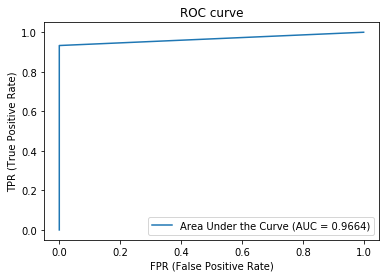

In [14]:
# Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_score)
AUC_ROC = roc_auc_score(y_true, y_score)
# test_integral = np.trapz(tpr,fpr) #trapz is numpy integration
print("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")


Area under Precision-Recall curve: 0.9992051656127984


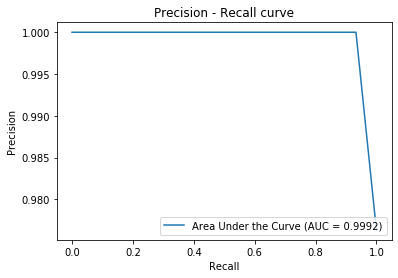

In [15]:
precision, recall, thresholds = precision_recall_curve(y_true, y_score)
precision = np.fliplr([precision])[0]  #so the array is increasing (you won't get negative AUC)
recall = np.fliplr([recall])[0]  #so the array is increasing (you won't get negative AUC)
AUC_prec_rec = np.trapz(precision,recall)

print("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))

prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")

In [16]:
# confusion = confusion_matrix(y_true, y_score)

specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print("Specificity: " +str(specificity))

sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print("Sensitivity: " +str(sensitivity))

precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
    
print("Precision: " +str(precision))

# F1 score
F1_score = f1_score(y_true, y_score, labels=None, average='binary', sample_weight=None)
print("\nF1 score (F-measure): " +str(F1_score))

Specificity: 1.0
Sensitivity: 0.9328223378045442
Precision: 1.0

F1 score (F-measure): 0.9652437469903408


In [17]:
# Compute The IoU Scores:

intersection_values = 0
union_values = 0

for i, j in zip(y_true, y_score):
    if i and j == 1:
        intersection_values += 1
        
for i, j in zip(y_true, y_score):
    if i or j == 1:
        union_values += 1

In [18]:
print("The IoU Score for the single image = ", np.float32(intersection_values/union_values))

The IoU Score for the single image =  0.93282235


## Individual Blocks:

In [19]:
import pandas as pd

df = pd.DataFrame(columns = ['Recall', 'Precision', 'Accuracy', 'F1-Score'])

In [20]:
count = 0

for i, j in zip(os.listdir(dir1), os.listdir(dir2)):
    
    append_list = []
    
    img1 = Image.open(dir1 + i)
    img2 = Image.open(dir2 + j)

    numpy_data1 = np.asarray(img1)
    numpy_data2 = np.asarray(img2)
    
    final_shape = numpy_data1.shape[0]*numpy_data1.shape[1]*numpy_data1.shape[2]

    a = np.reshape(numpy_data1, final_shape)
    b = np.reshape(numpy_data2, final_shape)

    y_score = np.empty((a.shape[0]))

    for i in range(a.shape[0]):
        if a[i] == b[i]:
            y_score[i] = 1
        else:
            y_score[i] = 0

    threshold_value = 0.5
    y_true = np.empty((a.shape[0]))

    for i in range(a.shape[0]):
        if np.float32(int(a[i])-int(b[i]))/255.0 > 0.5:
            y_true[i] = 0
        else:
            y_true[i] = 1
            
    count += 1
    
    print(f"\n Image{count}")
            
#     print("The Confusion Matrix = ")
#     print(confusion_matrix(y_true, y_score))
    
    confusion = confusion_matrix(y_true, y_score)
    
    # confusion = confusion_matrix(y_true, y_score)

    specificity = 0
    if float(confusion[0,0]+confusion[0,1])!=0:
        specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
#     print("Specificity: " +str(specificity))

    sensitivity = 0
    if float(confusion[1,1]+confusion[1,0])!=0:
        sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
    print("Sensitivity: " +str(sensitivity))
    append_list.append(sensitivity)
    
    precision = 0
    if float(confusion[1,1]+confusion[0,1])!=0:
        precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])

    print("Precision: " +str(precision))
    append_list.append(precision)
    
    # Accuracy
    
    accuracy = 0

    accuracy = float(confusion[1,0]+confusion[1,1])/float(confusion[0,0]+confusion[0,1]+confusion[1,0]+confusion[1,1])
    print("Accuracy: " +str(accuracy))
    append_list.append(accuracy)

    # F1 score
    F1_score = f1_score(y_true, y_score, labels=None, average='binary', sample_weight=None)
    print("F1 score (F-measure): " +str(F1_score))
    append_list.append(F1_score)
    
    df.loc[len(df)] = append_list
        
#     if count == 10:
#         break


 Image1
Sensitivity: 0.9767310855263158
Precision: 1.0
Accuracy: 1.0
F1 score (F-measure): 0.9882285887827333

 Image2
Sensitivity: 0.9472124921570827
Precision: 1.0
Accuracy: 0.9895682565789473
F1 score (F-measure): 0.9728907306955287

 Image3
Sensitivity: 0.9501933795456616
Precision: 1.0
Accuracy: 0.9929851973684211
F1 score (F-measure): 0.9744606760659079

 Image4
Sensitivity: 0.9406827131636026
Precision: 1.0
Accuracy: 0.9762952302631579
F1 score (F-measure): 0.9694348352597518

 Image5
Sensitivity: 0.939721799336823
Precision: 1.0
Accuracy: 0.9858347039473684
F1 score (F-measure): 0.9689243062155688

 Image6
Sensitivity: 0.9469675869150409
Precision: 1.0
Accuracy: 0.9891077302631579
F1 score (F-measure): 0.9727615326308597

 Image7
Sensitivity: 0.9555983514362676
Precision: 1.0
Accuracy: 0.9906949013157895
F1 score (F-measure): 0.9772951084095964

 Image8
Sensitivity: 0.9334230281424605
Precision: 1.0
Accuracy: 0.9596381578947368
F1 score (F-measure): 0.9655652328081022

 Image9

In [21]:
df.to_csv('values.csv')

## GLOBAL:

In [22]:
final_shape = data1.shape[0]*data1.shape[1]*data1.shape[2]*data1.shape[3]

c = np.reshape(data1, final_shape)
d = np.reshape(data2, final_shape)

y_score_all = np.empty((c.shape[0]))

for i in range(c.shape[0]):
    if c[i] == d[i]:
        y_score_all[i] = 1
    else:
        y_score_all[i] = 0
        
y_score_all

array([1., 1., 1., ..., 1., 1., 1.])

In [23]:
threshold_value = 0.5
y_true_all = np.empty((c.shape[0]))

for i in range(c.shape[0]):
    if np.float32(int(c[i])-int(d[i]))/255.0 > 0.5:
        y_true_all[i] = 0
    else:
        y_true_all[i] = 1
        
y_true_all

array([1., 1., 1., ..., 1., 1., 1.])

In [24]:
print("The Global Confusion Matrix = ")
confusion_matrix(y_true_all, y_score_all)

The Global Confusion Matrix = 


array([[  534879,        0],
       [ 1562376, 24168345]], dtype=int64)

In [25]:
confusion = confusion_matrix(y_true_all, y_score_all)


Area under the ROC curve: 0.9696398713428979


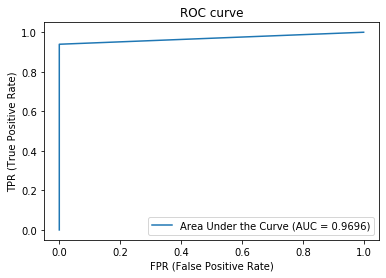

In [26]:
# Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true_all), y_score_all)
AUC_ROC = roc_auc_score(y_true_all, y_score_all)
# test_integral = np.trapz(tpr,fpr) #trapz is numpy integration
print("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")


Area under Precision-Recall curve: 0.9993817390329564


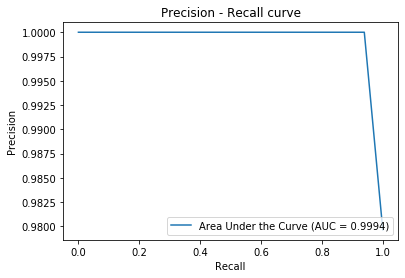

In [27]:
precision, recall, thresholds = precision_recall_curve(y_true_all, y_score_all)
precision = np.fliplr([precision])[0]  #so the array is increasing (you won't get negative AUC)
recall = np.fliplr([recall])[0]  #so the array is increasing (you won't get negative AUC)
AUC_prec_rec = np.trapz(precision,recall)

print("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))

prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")

In [28]:
# confusion = confusion_matrix(y_true, y_score)

specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print("Specificity: " +str(specificity))

sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print("Sensitivity: " +str(sensitivity))

precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
    
print("Precision: " +str(precision))

# F1 score
F1_score = f1_score(y_true, y_score, labels=None, average='binary', sample_weight=None)
print("\nF1 score (F-measure): " +str(F1_score))

Specificity: 1.0
Sensitivity: 0.9392797426857957
Precision: 1.0

F1 score (F-measure): 0.9652437469903408


In [29]:
accuracy = 0

accuracy = float(confusion[1,0]+confusion[1,1])/float(confusion[0,0]+confusion[0,1]+confusion[1,0]+confusion[1,1])
print("Accuracy: " +str(accuracy))

Accuracy: 0.9796357593201754


In [30]:
# Compute The IoU Scores:

intersection_values = 0
union_values = 0

for i, j in zip(y_true_all, y_score_all):
    if i and j == 1:
        intersection_values += 1
        
for i, j in zip(y_true_all, y_score_all):
    if i or j == 1:
        union_values += 1
        
print("The IoU Score for the images = ", np.float32(intersection_values/union_values))

The IoU Score for the images =  0.93927974
